In [ ]:
!pip install librosa

import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [ ]:
create_pngs_from_wavs('/content/drive/MyDrive/Sounds/background', 'Spectrograms/background')

In [ ]:
create_pngs_from_wavs('/content/drive/MyDrive/Sounds/chainsaw', 'Spectrograms/chainsaw')

In [ ]:
create_pngs_from_wavs('/content/drive/MyDrive/Sounds/engine', 'Spectrograms/engine')


In [ ]:
create_pngs_from_wavs('/content/drive/MyDrive/Sounds/storm','Spectrograms/storm')

In [ ]:
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

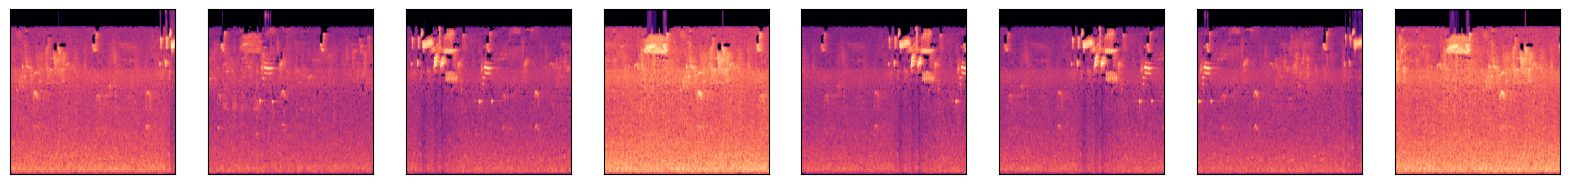

In [ ]:
images, labels = load_images_from_path('/content/Spectrograms/background', 0)
show_images(images)

x += images
y += labels

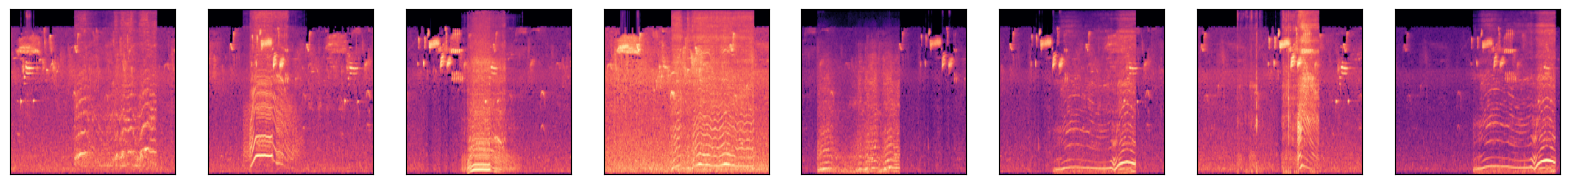

In [ ]:
images, labels = load_images_from_path('Spectrograms/chainsaw', 1)
show_images(images)

x += images
y += labels

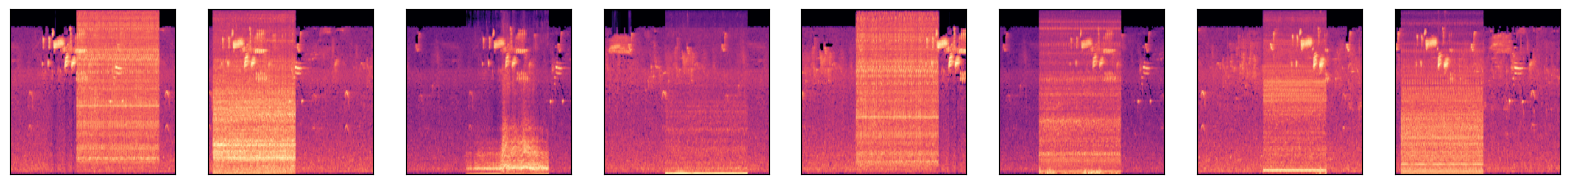

In [ ]:
images, labels = load_images_from_path('Spectrograms/engine', 2)
show_images(images)

x += images
y += labels

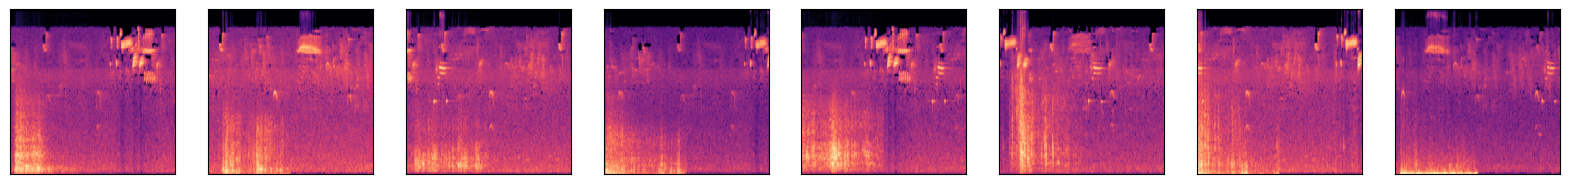

In [ ]:
images, labels = load_images_from_path('Spectrograms/storm', 3)
show_images(images)

x += images
y += labels

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      18,875,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,212,548 (73.29 MB)

 Trainable params: 19,212,548 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.2170 - loss: 1.9313 - val_accuracy: 0.5833 - val_loss: 1.1561
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6074 - loss: 0.9787 - val_accuracy: 0.6167 - val_loss: 0.7472
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6144 - loss: 0.7704 - val_accuracy: 0.4417 - val_loss: 0.9085
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.6348 - loss: 0.7711 - val_accuracy: 0.6833 - val_loss: 0.6322
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7020 - loss: 0.6737 - val_accuracy: 0.7417 - val_loss: 0.5193
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8103 - loss: 0.4561 - val_accuracy: 0.6333 - val_loss: 0.6683
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.7157 - loss: 0.6014 - val_accuracy: 0.6750 - val_loss: 0.6804
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7480 - loss: 0.5891 - val_accuracy: 0.6833 - val_loss:

[]

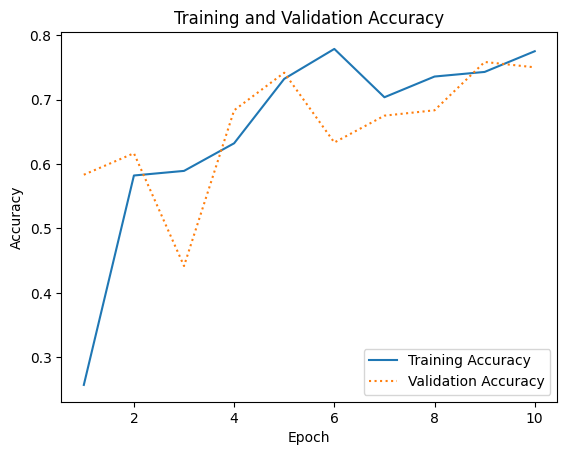

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

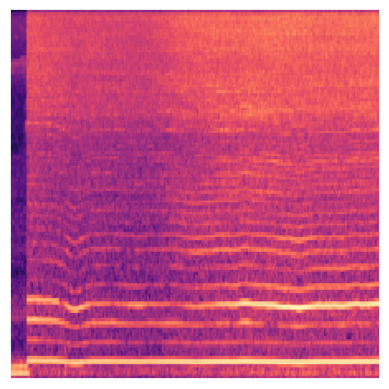

In [ ]:
create_spectrogram('Sounds/samples/sample1.wav', 'Spectrograms/sample1.png')

x = image.load_img('Spectrograms/sample1.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [ ]:
x = np.squeeze(x)  # Removes extra dimensions if needed

# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# y = base_model.predict(x)
predictions = hist.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

AttributeError: 'History' object has no attribute 'predict'

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = "/content/Spectrograms/chainsaw/chainsaw_40.png"  # Update with actual image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
x = image.img_to_array(img)  # Convert to NumPy array
x = np.expand_dims(x, axis=0)  # Add batch dimension
x = x / 255.0  # Normalize (same as training)

# Make prediction
predictions = model.predict(x)

# Define class labels (adjust according to your dataset)
class_labels = ["baground", "Chainsaw", "engine", "strom"]

# Print predictions
for i, label in enumerate(class_labels):
    print(f"{label}: {predictions[0][i]:.4f}")

# Get the predicted class
predicted_class = class_labels[np.argmax(predictions)]
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
baground: 0.0003
Chainsaw: 0.4595
engine: 0.5401
strom: 0.0001
Predicted Class: engine


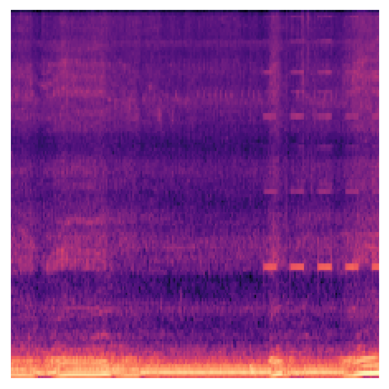

In [ ]:
create_spectrogram('Sounds/samples/sample2.wav', 'Spectrograms/sample2.png')

x = image.load_img('Spectrograms/sample2.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = "/content/Spectrograms/sample2.png"  # Update with actual image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
x = image.img_to_array(img)  # Convert to NumPy array
x = np.expand_dims(x, axis=0)  # Add batch dimension
x = x / 255.0  # Normalize (same as training)

# Make prediction
predictions = model.predict(x)

# Define class labels (adjust according to your dataset)
class_labels = ["Class 1", "Class 2", "Class 3", "Class 4"]

# Print predictions
for i, label in enumerate(class_labels):
    print(f"{label}: {predictions[0][i]:.4f}")

# Get the predicted class
predicted_class = class_labels[np.argmax(predictions)]
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Class 1: 0.0005
Class 2: 0.0519
Class 3: 0.8924
Class 4: 0.0553
Predicted Class: Class 3


In [ ]:
model.save("my_model.h5")  # Save the entire model


In [ ]:
import tensorflow as tf

# Load Keras model
model = tf.keras.models.load_model("my_model.h5")

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("deforestation.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpwlq6g1hj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132931323434896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132931323436240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132931323434704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132931323440272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132931323437392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132931323438160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132931323435088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132931323442576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132931323442384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132931323443344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132931323443152

In [ ]:
!xxd -i deforestation.tflite > deforestation.h

In [ ]:
import shutil
from google.colab import files

shutil.make_archive('/content/Spectrograms', 'zip', '/content/Spectrograms')  # Replace 'folder_name' with your folder's name
files.download('/content/Spectrograms.zip')  # Download the zipped folder


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>